<a href="https://colab.research.google.com/github/Tomjaz/housepricedata/blob/main/housepricedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd



In [ ]:
df=pd.read_csv("/content/housepricedata.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [ ]:
df.describe().loc["mean"]

,mean
LotArea,10516.828082
OverallQual,6.099315
OverallCond,5.575342
TotalBsmtSF,1057.429452
FullBath,1.565068
HalfBath,0.382877
BedroomAbvGr,2.866438
TotRmsAbvGrd,6.517808
Fireplaces,0.613014
GarageArea,472.980137


In [ ]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]

In [ ]:
x

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460
1456,13175,6,6,1542,2,0,3,7,2,500
1457,9042,7,9,1152,2,0,4,9,2,252
1458,9717,5,6,1078,1,0,2,5,0,240


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scale=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()


In [ ]:
input_layer=Dense(20,input_shape=(10,))
model.add(input_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
hidden_layer1=Dense(20,activation="relu")
model.add(hidden_layer1)

In [ ]:
output_layer=Dense(1,activation="sigmoid")
model.add(output_layer)

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history=model.fit(x_scale,y,epochs=100,batch_size=20)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9103 - loss: 0.2395
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8925 - loss: 0.2602
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8959 - loss: 0.2507
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8900 - loss: 0.2789
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2486
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.2355
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.2415
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.2259
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8954 - loss: 0.2318
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8881 - loss: 0.2445
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.2304
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [ ]:
val_loss,val_acc=model.evaluate(x_test,y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2958  


In [ ]:
val_loss,val_acc

(0.2975713908672333, 0.888127863407135)

In [ ]:
st=[[14260,8,5,1145,2,1,4,9,1,836]]

In [ ]:
scaled_data=scaler.fit_transform(st)
result=model.predict(scaled_data)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[0.00080363]], dtype=float32)

In [ ]:
if result>0.5:
  print("house price is high")
else:
  print("house price is low")

house price is low


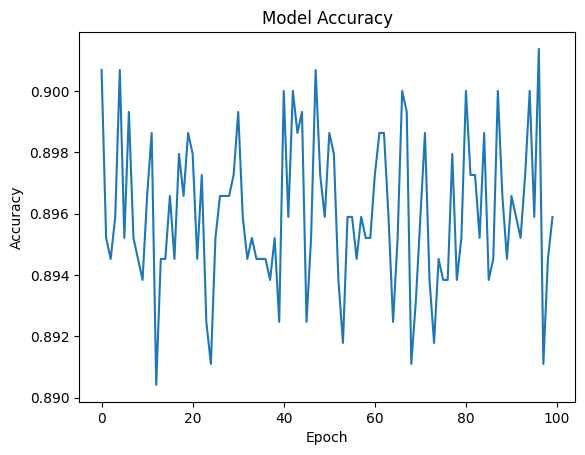

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

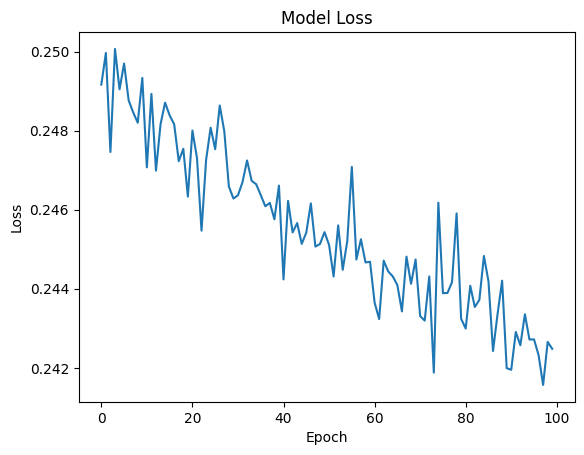

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.show()